## 단순회귀분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## [Part0] 간단하게 예측의 원리에 대하여 알아보기

[3 4 5 6 7]


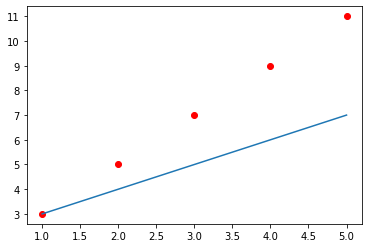

In [12]:
x = [1,2,3,4,5]
y = [3,5,7,9,11]
w=1;b=2
y_hat = np.array(x)*w+b
print(y_hat)
plt.plot(x,y,'ro')
plt.plot(x,y_hat)


[ 2  6 11 19 28]


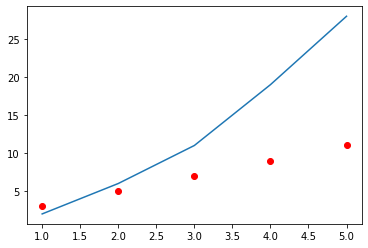

[ 2  6 11 19 28]


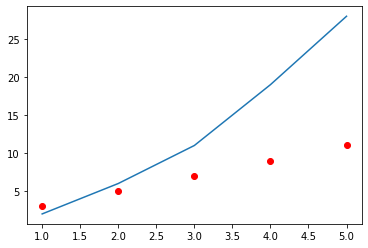

[ 2  6 11 19 28]


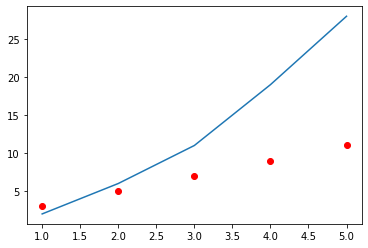

[ 2  6 11 19 28]


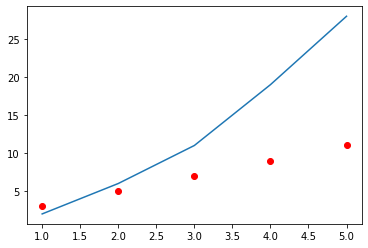

[ 2  6 11 19 28]


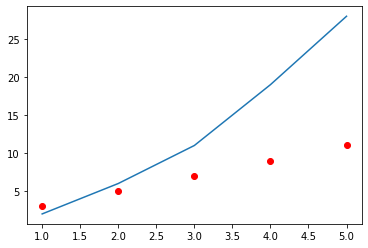

In [14]:
w = [1,2,3,4,5];b=[1,2,2,3,3]
for w1,b1 in zip(w,b):
    y_hat = np.array(x)*w+b
    print(y_hat)
    plt.plot(x,y,'ro')
    plt.plot(x,y_hat)
    plt.show()

In [18]:
import math

18.0
[1.4 2.4 3.4 4.4 5.4]


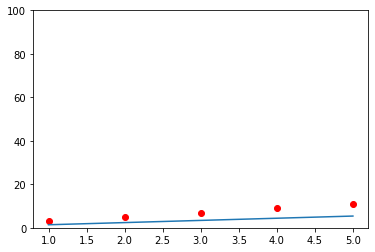

16.0
[1.8 2.8 3.8 4.8 5.8]


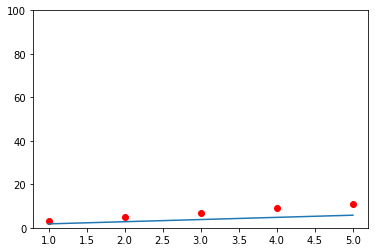

12.0
[2.6 3.6 4.6 5.6 6.6]


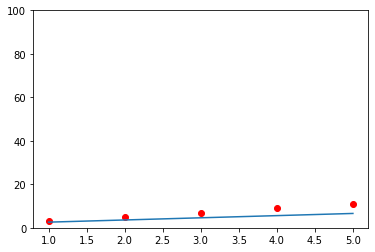

6.800000000000001
[4.2 5.2 6.2 7.2 8.2]


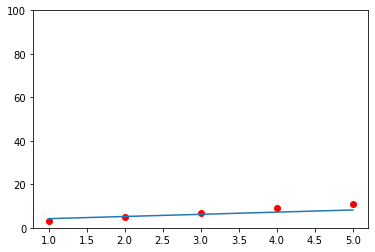

12.000000000000002
[ 7.4  8.4  9.4 10.4 11.4]


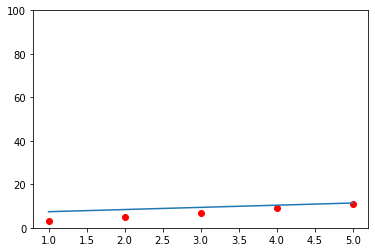

44.0
[13.8 14.8 15.8 16.8 17.8]


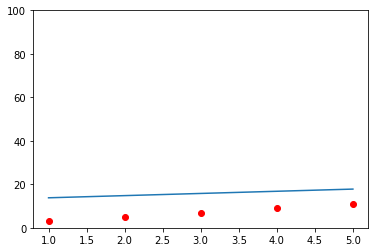

108.0
[26.6 27.6 28.6 29.6 30.6]


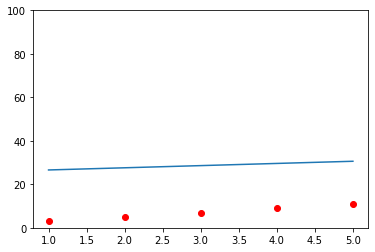

236.0
[52.2 53.2 54.2 55.2 56.2]


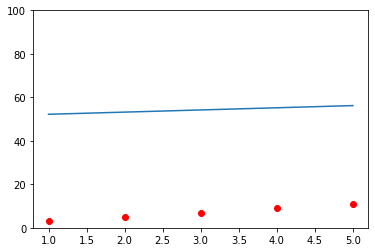

492.0
[103.4 104.4 105.4 106.4 107.4]


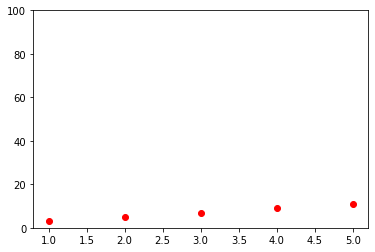

1004.0
[205.8 206.8 207.8 208.8 209.8]


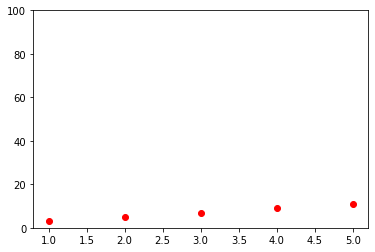

In [20]:
x = [1,2,3,4,5]
y = [3,5,7,9,11]
w = 0.5;b=0.2

for epoch in range(10):
    w=w*0.3; b=b*2 # 인공신경망에서는 w와b를 오차역전파 수식을 이용하여서 업데이트함
    y_hat=np.array(x)+b
    
    err = np.mean(sum((y_hat -y)))

    print(err)
    print(y_hat)
    plt.ylim([0,100])
    plt.plot(x,y,'ro')
    plt.plot(x,y_hat)
    plt.show()

## [part1] 모집단과 표본집단의 분산 표준편차 계산

## [part2] 상관계수 계산

In [44]:
import numpy as np
x=[20,25,30,34,40]
y=[26,30,40,48,66]
df=pd.DataFrame({'x':x,'y':y})

print(df)
df.corr()
print(df.corr(method='pearson'))

df['x'].corr(df['y'])

    x   y
0  20  26
1  25  30
2  30  40
3  34  48
4  40  66
          x         y
x  1.000000  0.978521
y  0.978521  1.000000


0.9785212611534365

In [72]:
# 식을 직접 작성해보기
x=[20,25,30,34,40]
y=[26,30,40,48,66]

# x_ave = np.average(x)
x_ave = np.mean(x)
print(np.array(x)-x_ave)
# y_ave = np.average(y)
y_ave = np.mean(y)
print(np.array(y)-y_ave)
sx = (np.array(x)-x_ave)/np.sqrt((sum((np.array(x)-x_ave)**2)/(len(x)-1)))
sy = (np.array(y)-y_ave)/np.sqrt((sum((np.array(y)-y_ave)**2)/(len(y)-1)))
sx_sy = sx * sy
df = pd.DataFrame({
    'x':x,'y':y,'계산x':sx,'계산y':sy,'곱셈':sx_sy
})
print(df)
df['곱셈'].mean()

[-9.8 -4.8  0.2  4.2 10.2]
[-16. -12.  -2.   6.  24.]
    x   y       계산x       계산y        곱셈
0  20  26 -1.263071 -1.003929  1.268034
1  25  30 -0.618647 -0.752947  0.465808
2  30  40  0.025777 -0.125491 -0.003235
3  34  48  0.541316  0.376473  0.203791
4  40  66  1.314625  1.505894  1.979686


0.7828170089227491

In [66]:
np.std(x), np.std(y)

(6.939740629158989, 14.25482374496437)

In [71]:
r = df['x'].corr(df['y'])
w = r*df['y'].std()/df['x'].std()
w

2.0099667774086383

In [ ]:
df['lr'] = df['x']*w+b

In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

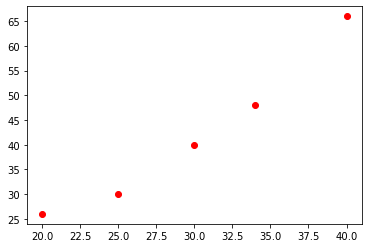

In [47]:
# sklearn ML에 계산에 참여하는 자료는 모두 array여야함

x=df['x'].values.reshape(-1,1)
y=df['y'].values.reshape(-1,1)
model = model.fit(x,y)

model.predict([[3]])

plt.plot(x,y,'ro')

In [48]:
print(model.coef_)
print(model.intercept_)

[[2.00996678]]
[-17.89700997]


In [49]:
from sklearn.metrics import mean_squared_error
y_hat = model.predict(x)
mean_squared_error(y,y_hat)

8.635215946843852

## [part9] 모델 저장 및 활용

In [59]:
import pickle
filename='StartLr.sav'
pickle.dump(model,open(filename,'wb')) # 일의 순서를 기억하여 재사용(w,b는 다시 생성)

In [60]:
x=[[20],[25],[30],[34],[40]]
y=[[26],[30],[40],[48],[66]]

load_model=pickle.load(open('StartLr.sav','rb'))
print(load_model.score(x,y))

print(load_model.predict([[20]]))

0.9575038585293117
[[22.30232558]]


In [79]:
filepath = 'C:/Workspace/분석데이터활용/pandasData분석/data/part3/auto-mpg.csv'

In [80]:
df = pd.read_csv(filepath, header=None)

In [81]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
print(df.head())
print('\n')

pd.set_option('display.max_columns',10)
print(df.head())
df.info(), df.describe()

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

(None,
               mpg   cylinders  displacement       weight  acceleration  \
 count  398.000000  398.000000    398.000000   398.000000    398.000000   
 mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
 std      7.815984    1.701004    104.269838   846.841774      2.757689   
 min      9.000000    3.000000     68.000000  1613.000000      8.000000   
 25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
 50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
 75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
 max     46.600000    8.000000    455.000000  5140.000000     24.800000   
 
        model year      origin  
 count  398.000000  398.000000  
 mean    76.010050    1.572864  
 std      3.697627    0.802055  
 min     70.000000    1.000000  
 25%     73.000000    1.000000  
 50%     76.000000    1.000000  
 75%     79.000000    2.000000  
 max     82.000000    3.000000  )

In [82]:
df['horsepower'].unique()
df['horsepower'].replace('?',np.nan, inplace=True)
df.dropna(subset=['horsepower'],axis=0,inplace=True) #axis=0 해서 행단위로 한줄에 na값이 있는 줄은 모두 삭제
df['horsepower'] = df['horsepower'].astype('float')
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [84]:
ndf = df[['mpg','cylinders','horsepower','weight']]
print(ndf.head())

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0


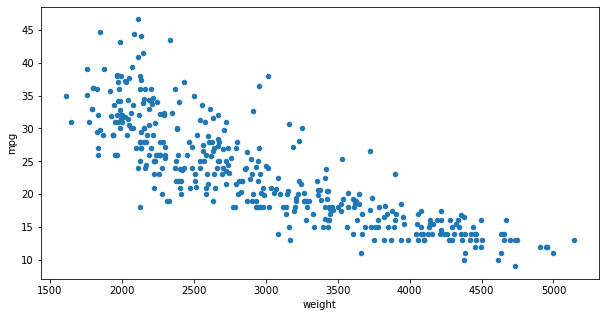

In [88]:
ndf.plot(kind='scatter',x='weight',y='mpg', figsize=(10,5))
plt.show()
plt.close()

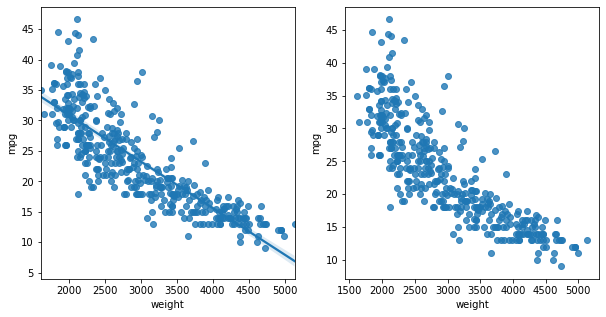

In [90]:
fig =plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.regplot(x='weight',y='mpg', data=ndf,ax=ax1)
sns.regplot(x='weight',y='mpg', data=ndf,ax=ax2, fit_reg=False) # 회귀선 미표시
plt.show()
plt.close()

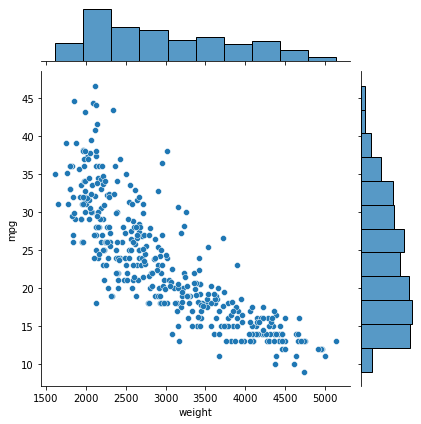

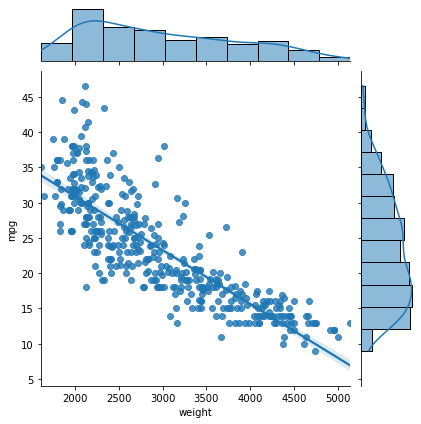

In [91]:
sns.jointplot(x='weight', y='mpg',data=ndf)
sns.jointplot(x='weight',y='mpg',kind='reg',data=ndf)

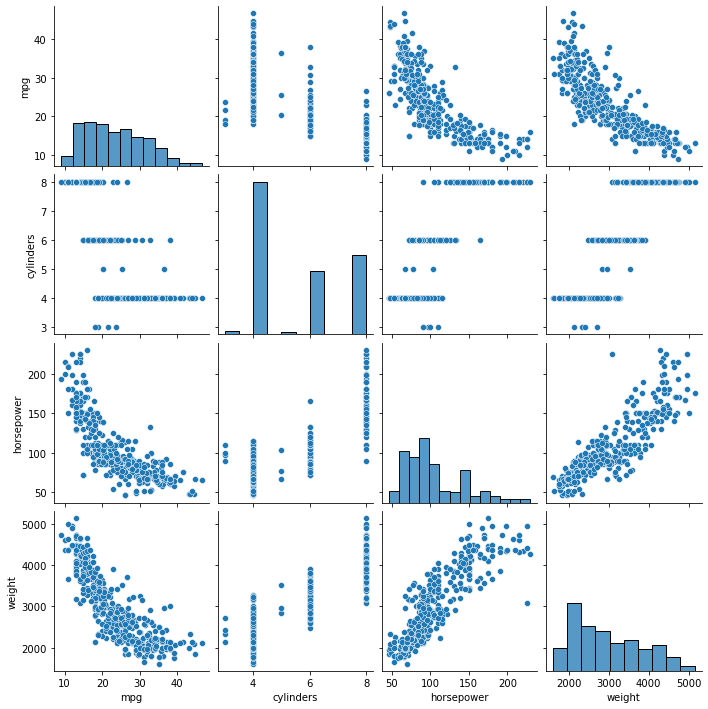

In [92]:
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

In [93]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<AxesSubplot:>

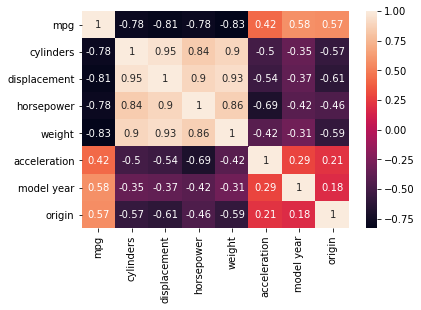

In [94]:
sns.heatmap(df.corr(),annot=True)

In [102]:
X = ndf[['weight','cylinders','horsepower']]
y = ndf['mpg']

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
len(X_train), len(X_test)

(274, 3) (118, 3)
(274,) (118,)


(274, 118)

In [104]:
lr= LinearRegression()
lr.fit(X_train,y_train)

r_square = lr.score(X_test,y_test)
print(r_square)

0.6939048496695586


In [105]:
print('기울기a: ',lr.coef_)
print('y절편b: ',lr.intercept_)

기울기a:  [-0.00522268 -0.60691288 -0.03714088]
y절편b:  46.414351269634416


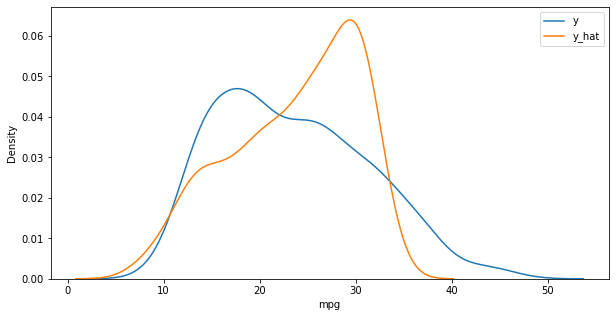

In [100]:
y_hat = lr.predict(x)

plt.figure(figsize=(10,5))
ax1 = sns.kdeplot(y,label="y")
ax2 = sns.kdeplot(y_hat,label="y_hat")
plt.legend()
plt.show()

### 다항회귀분석

In [107]:
X = ndf[['weight']]
y = ndf['mpg']

In [108]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [110]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2) # 2차항
X_train_poly =poly.fit_transform(X_train)
print(X_train.shape)
print(X_train_poly.shape)

(274, 1)
(274, 3)


In [113]:
pr = LinearRegression()
pr.fit(X_train_poly,y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly,y_test)
print(r_square)

0.7087009262975685
